Ttest_relResult(statistic=-1.9590847978709398, pvalue=0.10741368937680572)


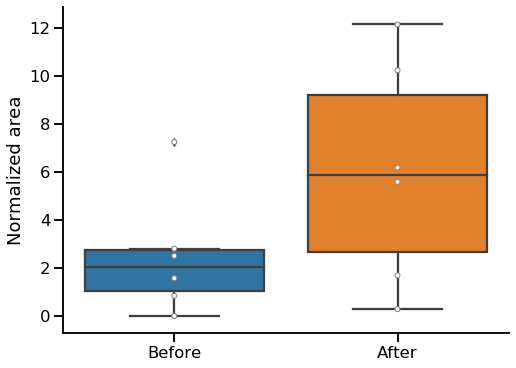

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from numpy import trapz


Cal_temp_C = np.load('Cal_temp_C.npy')
idx_components = np.load('cnm.estimates.idx_components.npy')
idx_components=np.array([ 0,  2,  3,  4,  5, 12])
Cal_temp_C = Cal_temp_C[idx_components] #select good trace


x = Cal_temp_C[:,:]#slicing the pharmacology time, sampling at 1 Hz. 
standardized_X = preprocessing.normalize(x,norm = "l2", axis=1) # row norm

ab= standardized_X[:,400:700]
ap= standardized_X[:,700:1000]

#print(ab.shape)

def trapz_area(row):
    return trapz(row, dx=1)

dfab = pd.DataFrame(ab)
dfap = pd.DataFrame(ap)



#dfap = pd.DataFrame(ap)
dfab['area']=dfab.apply(trapz_area,axis=1)
dfap['area']=dfap.apply(trapz_area,axis=1)

#print(dfap.head())
df1=pd.DataFrame()
df1['Before']=dfab['area']
df1['After']=dfap['area']
df = pd.melt(df1)
dfhold2=df.copy()

sns.set_context("talk") #paper, notebook, talk, and poster
#sns.set_style("white",{'ytick.left':True,'xtick.bottom': True,'ytick.right':False})

ax,fig = plt.subplots(figsize=(8,6))

ax=sns.boxplot(x="variable", y="value", data=df );
ax=sns.swarmplot(x="variable", y="value", data=df, color="white", edgecolor="grey", linewidth=1)
ax.set(title = '', xlabel = "", ylabel='Normalized area')
sns.despine() #magic to remove the x-top , and y-right axis

plt.savefig("box_second_pharma_p=.png",dpi=300)


from scipy import stats
print(stats.ttest_rel(df1['Before'],df1['After'])) #independent, paired t test

In [33]:
df1['Before'].describe()

count    6.000000
mean     2.487507
std      2.547767
min     -0.008337
25%      1.017403
50%      2.032640
75%      2.722903
max      7.236118
Name: Before, dtype: float64

In [34]:
df1['After'].describe()

count     6.000000
mean      6.011985
std       4.627548
min       0.276843
25%       2.657121
50%       5.876986
75%       9.211094
max      12.134797
Name: After, dtype: float64

In [35]:
print((df1['After'].mean()-df1['Before'].mean())/df1['Before'].mean())

1.416871516654588
